In [1]:
import sys
sys.path.append('..')

from olfactory_navigation import Environment
from olfactory_navigation.agents import QMDP_Agent
from olfactory_navigation.simulation import run_test

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

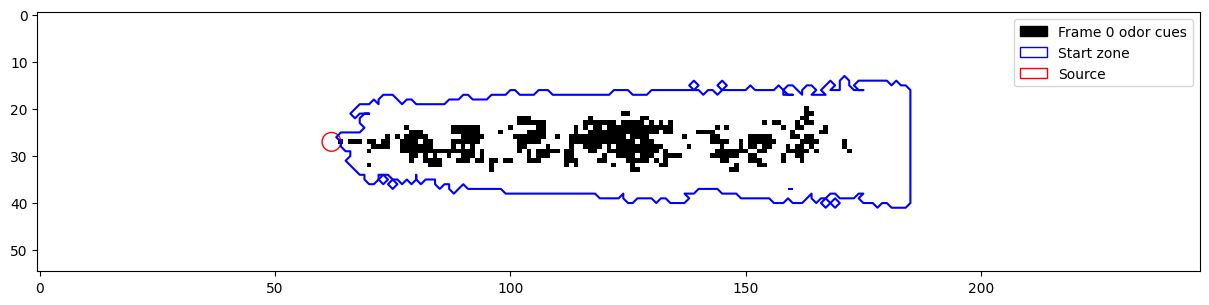

In [2]:
env = Environment(data="G:\\My Drive\\Documents\\Universita di Genova\Pimlb work\\nose_data_27_123.npy",
                  source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_treshold=3e-6)

env.plot()

In [3]:
ag = QMDP_Agent(env)

[04/24/2024, 18:04:08] Instantiation of MDP Model:
[04/24/2024, 18:04:08] - 13585 states
[04/24/2024, 18:04:08] - 4 actions
[04/24/2024, 18:04:08] - At most 1 reachable states per state-action pair
[04/24/2024, 18:04:08] - Starting generation of transitions table
[04/24/2024, 18:04:08]     > [Warning] No transition matrix or function provided but reachable states are, so probability to reach any reachable states will "1 / reachable state count" so here: 1.000.
[04/24/2024, 18:04:08]     > Done in 0.000s
[04/24/2024, 18:04:08] - Generation of state grid
[04/24/2024, 18:04:08] - Generating start probabilities table
[04/24/2024, 18:04:08] - Starting computation of reachable state probabilities from transition data
[04/24/2024, 18:04:08]     > Done in 0.000s

[04/24/2024, 18:04:08] POMDP particular parameters:
[04/24/2024, 18:04:08] - 3 observations
[04/24/2024, 18:04:08] - Starting of transitional observations for reachable states table
[04/24/2024, 18:04:08]     > Done in 0.002s
[04/24/2

In [4]:
train_hist = ag.train(expansions=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
hist = run_test(n=100, agent=ag, use_gpu=True)

[04/24/2024, 18:04:08] Sending Model to GPU...
[04/24/2024, 18:04:09]     > Done in 0.192s


  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 13.353s:
Simulations reached goal: 100/100 (0 failures) (100.00%)
	- Average step count: 132.57 (Successfull only: 132.57)
	- Extra steps: 63.66 (Successful only: 63.66)
	- Average discounted rewards (ADR): 0.329 (Successfull only: 0.329) (discount: 0.99)
	- Tmin/T: 0.630 (Successful only: 0.630)
